In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
train_dev_data = pd.read_csv('Combined_Dataset/deeploc_combined_data.csv')

In [3]:
len(train_dev_data)

577

In [4]:
train_dev_data.rename(columns={'ID':'ACC'}, inplace=True)

In [5]:
train_dev_data

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
573,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
574,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
575,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [6]:
original=pd.read_csv('Final_Datasets/Original_Dataset/multisub_5_partitions_unique.csv')

In [7]:
original

,Unnamed: 0,ACC,Kingdom,Partition,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome,Sequence
0,0,Q28165,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
1,1,Q86U42,Metazoa,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAAAGAAGGRGSGPGRRRHLVPGAGGEAGEGAPGGAGDY...
2,2,Q0GA42,Metazoa,3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAALGVRLRDCCSRGAVLLLFFSLSPRPPAAAAWLLGLR...
3,3,P82349,Metazoa,1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATEQQGSNGPVKKSMREKAVERRNVNKEHNSNFKAGY...
4,4,Q7L5N1,Metazoa,1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MAAAAAAAAATNGTGGSSGMEVDAAVVPSVMACGVTGSVSVALHPL...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28298,28298,Q09712,Fungi,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,MYYIGHPSYYRKHIEHVCFQHSGILKKRNYQKNQKKYIMKLNESAM...
28299,28299,Q9V3C5,Metazoa,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,MYYPVGWPKRVGLALPGESASIRHICCDAVKILVAAVGDDFLGIWY...
28300,28300,Q9SQQ9,Viridiplantae,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYYQNQHQGKNILSSSRMHITSERHPFLRGNSPGDSGLILSTDAKP...
28301,28301,Q9SQQ9-3,Viridiplantae,4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MYYQNQHQGKNILSSSRMHITSERHPFLRGNSPGDSGLILSTDAKP...


In [8]:
# Get the values from the column in df2
values_to_remove = original['ACC']

# Filter df1 based on values in df2's column 'A'
filtered_df = train_dev_data [~train_dev_data ['ACC'].isin(values_to_remove)]

In [9]:
filtered_df.reset_index(inplace=True, drop=True)

In [10]:
len(filtered_df)

538

In [11]:
filtered_df

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
534,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
535,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
536,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [12]:
def plot_label1_percentage(dataframe, selected_columns):
    """
    Plots the percentage of label 1 in each selected column of the DataFrame.

    Parameters:
    - dataframe (pd.DataFrame): The input DataFrame.
    - selected_columns (list): List of column names to analyze.

    Returns:
    - None (plots the result using matplotlib)
    """

    # Check if selected columns exist in the DataFrame
    invalid_columns = [col for col in selected_columns if col not in dataframe.columns]
    if invalid_columns:
        print(f"Invalid columns: {invalid_columns}")
        return

    # Initialize a plot
    plt.figure(figsize=(20,13))

    # Plot the percentage of label 1 for each selected column
    for col in selected_columns:
        label_counts = dataframe[col].value_counts(normalize=True)
        if 1 in label_counts.index:
            label1_percentage = label_counts[1] * 100
            plt.bar(col, label1_percentage, label=f'{col} - Label 1')

    # Add labels and title
    plt.xlabel('Columns')
    plt.ylabel('Percentage of Label 1')
    plt.title('Percentage of Label 1 in Selected Columns')
    plt.legend()

    # Show the plot
    plt.show()

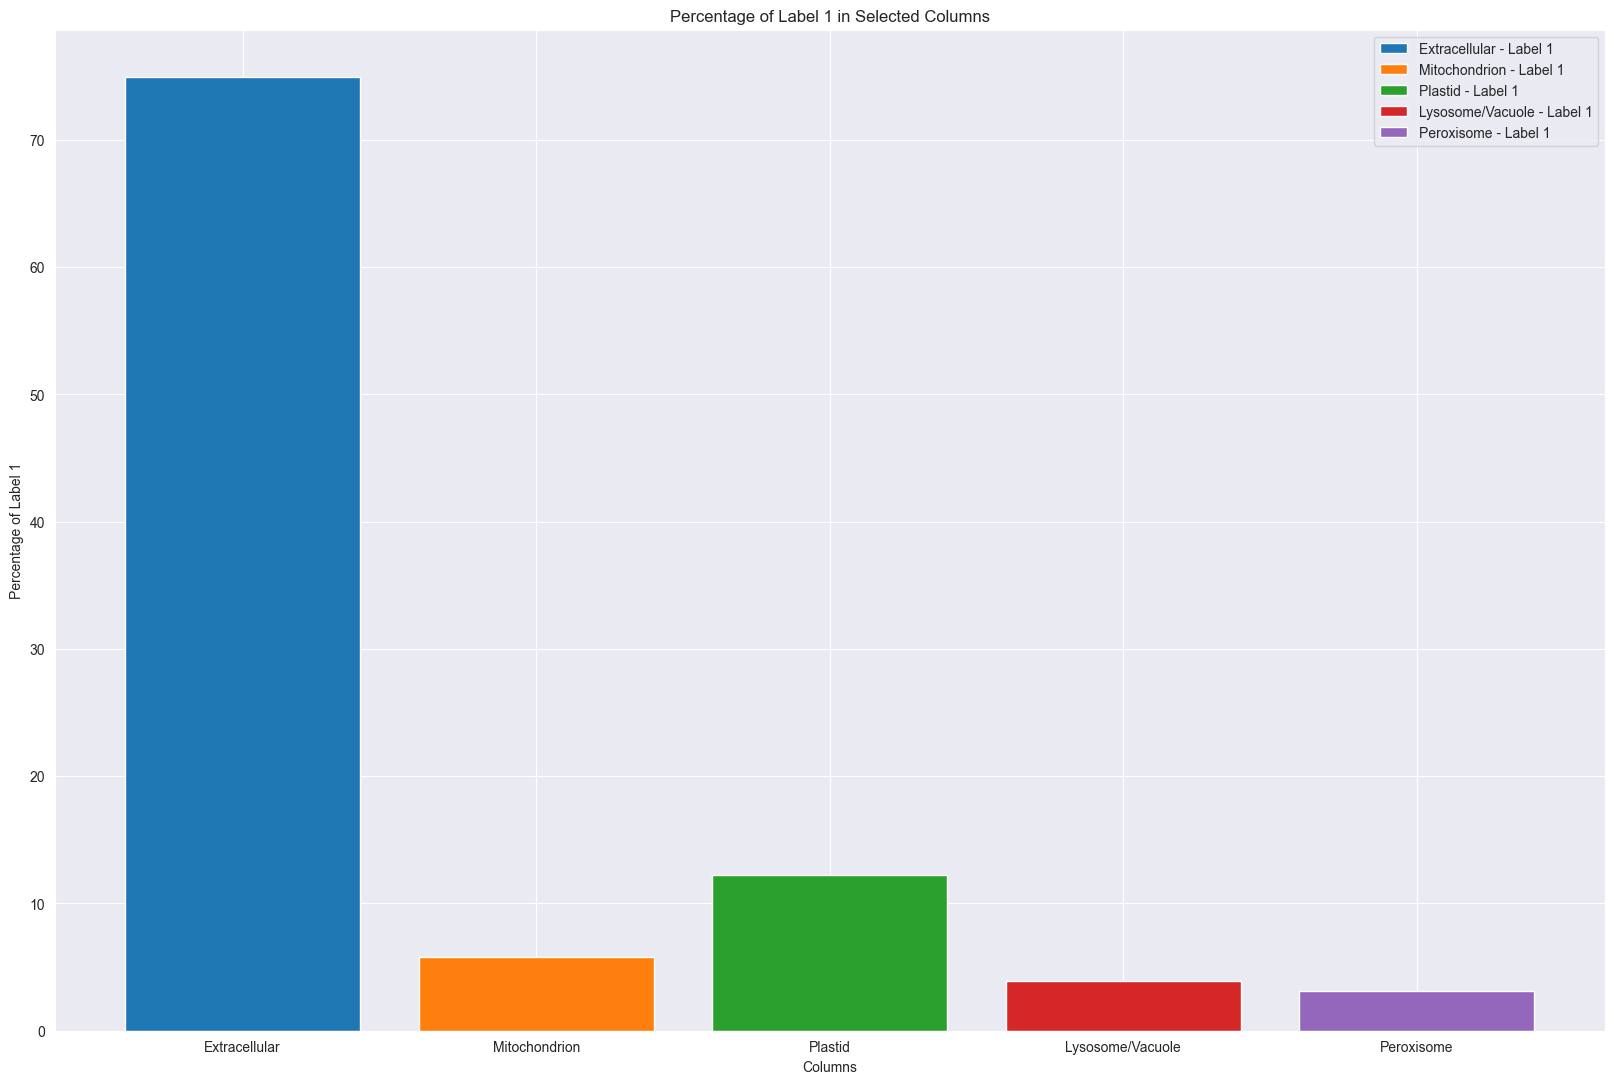

In [13]:
plot_label1_percentage(filtered_df, ['Membrane', 'Cytoplasm', 'Nucleus', 'Extracellular', 'Cell membrane', 'Mitochondrion', 'Plastid', 'Endoplasmic reticulum', 'Lysosome/Vacuole', 'Golgi apparatus', 'Peroxisome'])

In [14]:
filtered_df

,ACC,Sequence,Membrane,Cytoplasm,Nucleus,Extracellular,Cell membrane,Mitochondrion,Plastid,Endoplasmic reticulum,Lysosome/Vacuole,Golgi apparatus,Peroxisome
0,O75503,MAQEVDTAQGAEMRRGAGAARGRASWCWALALLWLAVVPGWSRVSG...,0,0,0,0,0,0,0,0,1,0,0
1,Q9LHA4,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
2,Q9LJI5,MYGFEALTFNIHGGYLEAIVRGHRAGLLTTADYNNLCQCENLDDIK...,0,0,0,0,0,0,0,0,1,0,0
3,Q9SZN1,MGAAENNLEMEGTLEIGMEYRTVSGVAGPLVILEKVKGPKYQEIVN...,0,0,0,0,0,0,0,0,1,0,0
4,P51799,MANVSKKVSWSGRDRDDEEGAPLLRRTGQPDEETPLLNGAGPGARQ...,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,P82971,IIFPGTLWCGNGNLANGTNQLGSWKETDSCCRTHDMCPDLIEAHGS...,0,0,0,1,0,0,0,0,0,0,0
534,B4YSU8,MQKATVLLLALLLLLPLSTAQDAEGSQEDAAQREVDIATRCGGTGD...,0,0,0,1,0,0,0,0,0,0,0
535,B3A0P0,IIECFFSCEIEKDGKSKEGKPCKPKGDKDKDKKCGGWRCKIKMCIKI,0,0,0,1,0,0,0,0,0,0,0
536,P86368,SLLEFGMMILEETGKLAVPFYSSYGCYCGWGGKATPKDATDRCCFV...,0,0,0,1,0,0,0,0,0,0,0


In [15]:
import pandas as pd
from sklearn.model_selection import KFold

# Assuming you have a DataFrame named 'data' with your dataset
# Let's say 'data' contains your features and labels

# Initialize KFold with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Add a new column to store the fold number
filtered_df['Partition'] = -1

# Assign fold numbers to each row
for fold_number, (train_index, test_index) in enumerate(kf.split(filtered_df)):
    print(train_index, test_index)
    filtered_df.loc[test_index, 'Partition'] = fold_number

# Displaying the updated DataFrame with fold numbers
print(filtered_df)


[  1   3   4   5   7   8  12  13  14  16  17  19  20  21  23  24  25  26
  27  28  29  31  32  34  35  36  37  38  40  41  42  43  44  45  47  48
  49  50  51  52  53  54  56  57  58  59  60  61  62  64  65  66  67  69
  71  74  80  81  83  85  87  88  91  92  94  95  96  97  98  99 100 102
 103 105 106 107 108 109 110 111 112 113 114 115 116 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 133 134 135 136 137 138 139 141 142
 143 144 145 146 147 150 151 152 154 155 156 157 158 159 160 161 162 163
 164 165 166 168 169 170 171 172 174 175 176 178 179 181 182 183 185 186
 187 188 189 190 191 193 194 195 197 198 199 200 201 202 203 205 206 207
 208 209 212 213 214 215 216 217 218 219 220 221 223 224 225 226 230 231
 232 233 234 235 236 238 239 240 241 242 243 245 246 249 251 252 253 254
 255 256 257 258 259 260 262 263 264 265 266 267 268 269 270 271 272 273
 276 277 279 280 281 282 283 284 285 286 287 288 289 291 292 293 294 295
 296 297 298 299 300 301 302 303 306 307 308 309 31

C:\Users\wadkr\AppData\Local\Temp\ipykernel_24412\3559374950.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Partition'] = -1


In [16]:
filtered_df['Kingdom'] = pd.NA

C:\Users\wadkr\AppData\Local\Temp\ipykernel_24412\2864204521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Kingdom'] = pd.NA


In [17]:
filtered_df.to_csv('Combined_Dataset/deeploc_combined_data_with_partition.csv', index=False)